Analyze I-94 Interstate highway traffic. Goal is to determine a few indicators of heavy traffic. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [4]:
i94.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
i94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [6]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [7]:
#display the histogram of traffic_volume column

(array([3311., 4778., 3431., 1671., 1325., 1514., 1767., 2986., 2737.,
        2033., 1735., 2607., 3981., 3907., 3061., 2575., 2334., 1523.,
         818.,  110.]),
 array([   0.,  364.,  728., 1092., 1456., 1820., 2184., 2548., 2912.,
        3276., 3640., 4004., 4368., 4732., 5096., 5460., 5824., 6188.,
        6552., 6916., 7280.]),
 <a list of 20 Patch objects>)

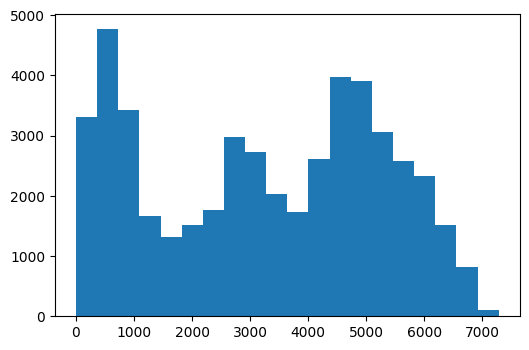

In [8]:
plt.hist(i94['traffic_volume'], bins = 20)

In [9]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
i94['date_time'] = pd.to_datetime(i94['date_time'])

In [11]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [12]:
day = i94.loc[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour < 19),:]

In [13]:
night = i94.loc[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour < 7),:]

In [14]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB


In [15]:
night.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              24327 non-null  object        
 1   temp                 24327 non-null  float64       
 2   rain_1h              24327 non-null  float64       
 3   snow_1h              24327 non-null  float64       
 4   clouds_all           24327 non-null  int64         
 5   weather_main         24327 non-null  object        
 6   weather_description  24327 non-null  object        
 7   date_time            24327 non-null  datetime64[ns]
 8   traffic_volume       24327 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.9+ MB


(array([  47.,  367.,  666.,  722., 1387., 3794., 7731., 4680., 3555.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <a list of 10 Patch objects>)

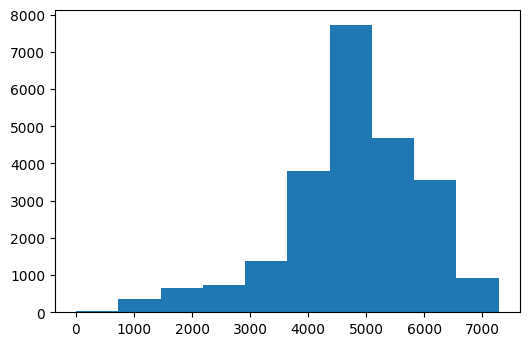

In [16]:
plt.hist(day['traffic_volume'])


(array([7153., 4983., 1950., 2350., 4349., 1882.,  256.,  150.,  821.,
         433.]),
 array([   0. ,  638.6, 1277.2, 1915.8, 2554.4, 3193. , 3831.6, 4470.2,
        5108.8, 5747.4, 6386. ]),
 <a list of 10 Patch objects>)

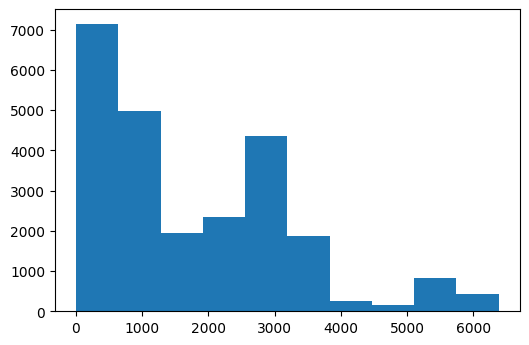

In [17]:
plt.hist(night['traffic_volume'])

In [18]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [19]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Analyze: the day's traffic volume distribution is skewed left. 
the night's traffice volume distribution is skewed right. It means more people traveling during day time. The traffic is light at night time, so we should not use night time data to find indicator of heavy traffic.

In [20]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month.index

<ipython-input-20-b17fdfb86925>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

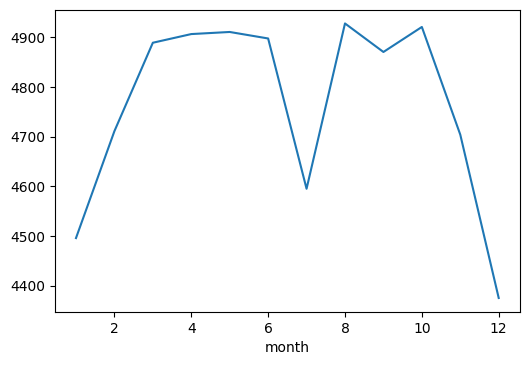

In [21]:
by_month['traffic_volume'].plot.line()

In [22]:
day['day_of_week'] = day['date_time'].dt.dayofweek

<ipython-input-22-dc8972d4dbf8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
day_of_week = day.groupby('day_of_week').mean()
day_of_week['traffic_volume']

day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

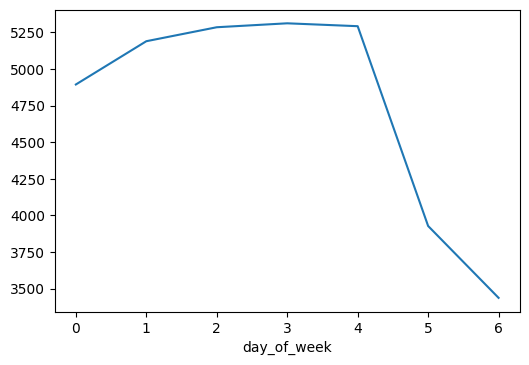

In [24]:
day_of_week['traffic_volume'].plot.line()

In [25]:
day['hour'] = day['date_time'].dt.hour

<ipython-input-25-f06ba96f8d36>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
weekday = day.copy().loc[day['day_of_week'] < 4,:]
weekend = day.copy().loc[day['day_of_week'] >= 4,:]

In [27]:
weekday.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,day_of_week,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,13


In [28]:
by_hour_weekday = weekday.groupby('hour').mean()

In [29]:
by_hour_weekend = weekend.groupby('hour').mean()

(6.0, 20.0)

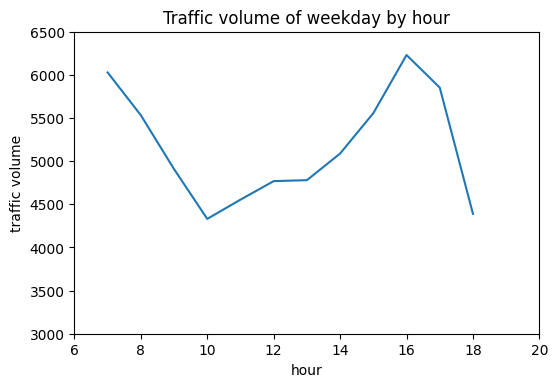

In [30]:
by_hour_weekday['traffic_volume'].plot.line()
plt.ylabel('traffic volume')
plt.title('Traffic volume of weekday by hour')
plt.ylim(3000,6500)
plt.xlim(6,20)

(6.0, 20.0)

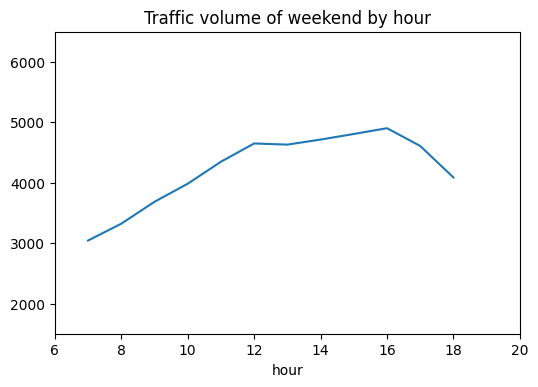

In [31]:
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic volume of weekend by hour')
plt.ylim(1500,6500)
plt.xlim(6,20)

During the weekday, the highest average of traffic volume is at 7 and 16 o'clock, and the lowest traffic volume average is at 10 and 18
During the weekend, the highest average of traffic volume is at 12 and 16 o'clock, and the lowest traffic volume average is at 7 and 18.
The maximum and minimum value of weekday both are higher than the ones on weekend.


In [51]:
day.head(20)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,day_of_week,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,13
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,10,1,14
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584,10,1,15
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015,10,1,16
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791,10,1,17
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770,10,1,18


In [33]:
day['temp'].corr(day['traffic_volume'])

0.12831656852303902

In [34]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  day_of_week          23877 non-null  int64         
 11  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 2.4+ MB


In [35]:
cor_list = []
colum = ['temp','rain_1h','clouds_all','snow_1h']
for value in colum:
    corr_value = day[value].corr(day['traffic_volume'])
    cor_list.append(corr_value)


In [36]:
day['temp'].corr(day['traffic_volume'])

0.12831656852303902

In [37]:
print(cor_list)

[0.12831656852303902, 0.003696509835073433, -0.03293234866163948, 0.0012653498471759859]


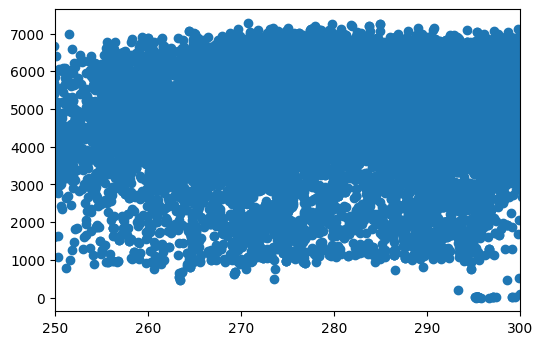

In [38]:
plt.scatter(day['temp'], day['traffic_volume'])
plt.xlim(250,300)
plt.show()

In [41]:
traffic_by_weather_main = day.groupby('weather_main').mean()

In [42]:
traffic_by_weather_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Clear to Thunderstorm
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            11 non-null     float64
 1   rain_1h         11 non-null     float64
 2   snow_1h         11 non-null     float64
 3   clouds_all      11 non-null     float64
 4   traffic_volume  11 non-null     float64
 5   month           11 non-null     float64
 6   day_of_week     11 non-null     float64
 7   hour            11 non-null     float64
dtypes: float64(8)
memory usage: 792.0+ bytes


In [43]:
traffic_by_weather_main['traffic_volume']

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64

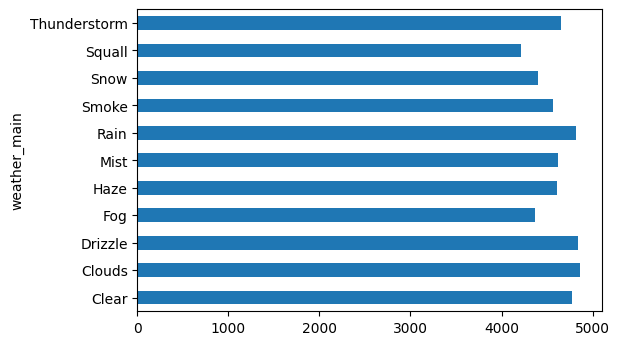

In [50]:
traffic_by_weather_main['traffic_volume'].plot.barh()


There are no any traffic volume exceeding 5000 cars. no any weather type as a heavy traffic indicator

In [52]:
traffic_by_weather_description = day.copy().groupby('weather_description').mean()

In [53]:
traffic_by_weather_description['traffic_volume']

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light intensity shower rain            4558.100000
light rain                             4859.650849
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4430.858896
mist                                   4623.976475
moderate rain                          4769.643312
overcast cl

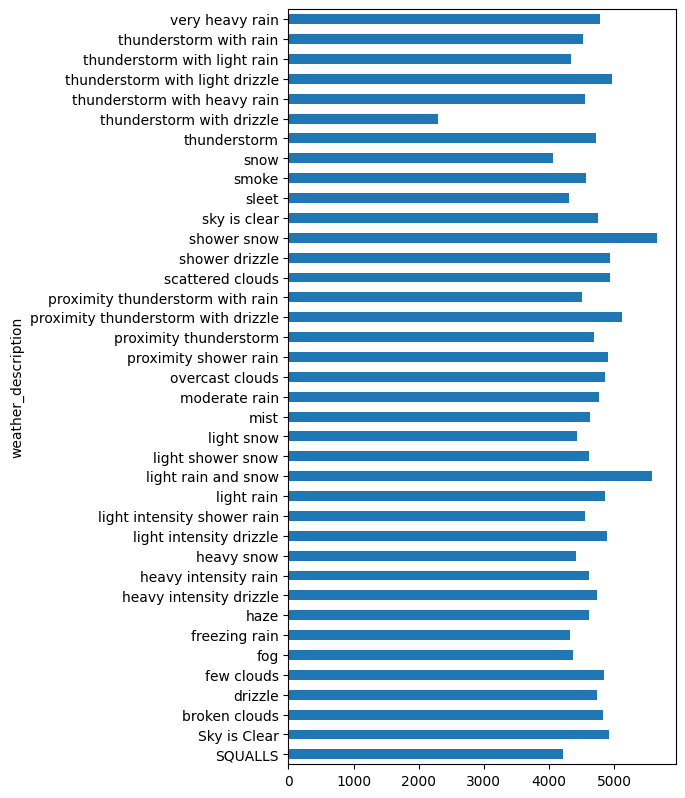

In [60]:
traffic_by_weather_description['traffic_volume'].plot(kind = 'barh', figsize = (5,10))

Light rain and snow, shower snow, proximity therderstorm with drizzle